# Выявление параметров, влияющих на успешность игры

Нужно выявить определяющие успешность игры закономерности. 
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. 

## Изучение данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')
# открываем датасет
data.head()
# выводим первые 5 строк датасета для ознакомления

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()
# смотрим общую информацию о датасете
display(data.describe())
# смотрим общую информацию о данных

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 16715 entries, 0 to 16714

Data columns (total 11 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   Name             16713 non-null  object 

 1   Platform         16715 non-null  object 

 2   Year_of_Release  16446 non-null  float64

 3   Genre            16713 non-null  object 

 4   NA_sales         16715 non-null  float64

 5   EU_sales         16715 non-null  float64

 6   JP_sales         16715 non-null  float64

 7   Other_sales      16715 non-null  float64

 8   Critic_Score     8137 non-null   float64

 9   User_Score       10014 non-null  object 

 10  Rating           9949 non-null   object 

dtypes: float64(6), object(5)

memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Выявленные проблемы:
1. Названия столбцов содержат верхний регистр.
2. Года преставлены в вещественном типе данных.
3. Пропуски в стобце Name.
4. Пропуски в столбце Year_of_Release.
5. Пропуски в столбце Genre.
6. Пропуски в столбце Critic_Score.
7. Пропуски в столбце User_Score, тип данных object.
8. Пропуски в столбце Rating.
9. Первый квартиль продаж на всех рынках равен 0, в Японии половина.

## Предобработка данных

### Работа с названиями колонок и добавление колонки с общей суммой продаж

In [4]:
data.columns = data.columns.str.lower() # переводим названия колонок в нижний регистр

In [5]:
data.shape

(16715, 11)

In [6]:
data[data['year_of_release'].isna()]
# смотрим строки с пропущенными значениями года выпуска

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
data = data.dropna(subset=['year_of_release']) # удаляем строки с пропущенными годами
data['year_of_release'] = data['year_of_release'].astype('int')
# переводим значения в столбце из вещественного типа в целочисленный
data.shape

(16446, 11)

In [8]:
data['world_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
# создаём новый столбец с суммарными продажами по всему миру
data.head()
# выводим первые пять строк измененного датасета

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Обработка пропусков

Пропуски могли образоваться или из-за того, что игра выходила давно, и тогда не было ни оценок, ни рейтингов игр. Также, возможно, дело в том, что некоторые игры имеют низкую популярность, поэтому их тоже никто не оценивал. Какие-то значения могли быть пропущены в ходе сбора данных, например, можно было использовать данные не только из ESRB, но также из европейских и японских рейтинговых агенств. Тоже самое касается и оценок игр критиками и игроками.

Как будем обрабатывать пропуски?


Значения 'tbd' в столбце user_score заменяем на NaN, чтобы их можно было обработать.

Пропуски в столбце rating заменим на unknown, чтобы данные по играм без рейтинга не потерять в дальнейшем.

In [9]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
# заменяем сокращение tbd на пропуски, чтобы иметь возможность обработать данные
data['user_score'] = data['user_score'].astype('float64')

In [10]:
data['name'] = data['name'].fillna('noname')
# заменяем пропуски в столбце на noname

In [11]:
data['rating'] = data['rating'].fillna('unknown')
data.info()
# смотрим общую информацию о датасете

<class 'pandas.core.frame.DataFrame'>

Int64Index: 16446 entries, 0 to 16714

Data columns (total 12 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   name             16446 non-null  object 

 1   platform         16446 non-null  object 

 2   year_of_release  16446 non-null  int64  

 3   genre            16444 non-null  object 

 4   na_sales         16446 non-null  float64

 5   eu_sales         16446 non-null  float64

 6   jp_sales         16446 non-null  float64

 7   other_sales      16446 non-null  float64

 8   critic_score     7983 non-null   float64

 9   user_score       7463 non-null   float64

 10  rating           16446 non-null  object 

 11  world_sales      16446 non-null  float64

dtypes: float64(7), int64(1), object(4)

memory usage: 1.6+ MB


In [12]:
data.head() # выводим первые пять строк измененного датасета

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Заключение.

Пропуски обработали, новый столбец с общемировыми продажами добавили, названия колонок привели к нижнему регистру, можно приступать к анализу.

## Исследовательный анализ данных

### Количество выпущенных игр по годам

In [13]:
data_years = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
# создаём сводную таблицу с количеством выпущенных игр по годам
display(data_years)
# выводим её на экран

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


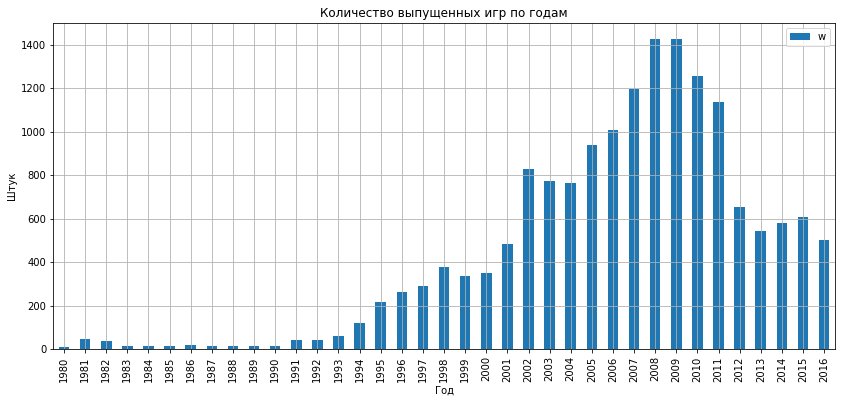

In [14]:
data_years.plot(kind='bar', grid=True, figsize=(14, 6))
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Штук')
plt.legend('world_sales')
# строим график продаж игр на данной платформе по годам

Вывод: из таблицы видно, что до середины 90-х годов игр выпускалось очень мало, потом, возможно, вследствие развития компьютерных мощностей, а также популяризации и увеличения числа компьютеров у частных лиц, начался бурный рост индустрии.
После появления на рынке консолей, специально созданных для игр, рост числа игр, выпускаемых каждый год, ещё увеличился. Длилось это до тех пор, пока, вероятно, не стали появляться игры в браузере и мобильные игры, т.е. до конца 2010-ых годов, потом начался спад.

### Продажи игр по платформам

In [15]:
data_platform = data.pivot_table(index='platform', values='world_sales', aggfunc='sum').sort_values(by='world_sales', ascending=False)
display(data_platform)

,world_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [16]:
#data_platform.sort_values(by='world_sales', ascending=False).plot(kind='barh', grid=True, figsize=(10, 10))

По данным таблицы видно, что наибольшие продажи были у следующих платформ:

In [17]:
data_platform_top = data_platform.reset_index().head(10)
# создаём датасет с платформами, показавшими лучшие продажи

In [18]:
top_platform_list = data_platform_top['platform'].unique()
print(top_platform_list)
# создаём список топ-платформ

['PS2' 'X360' 'PS3' 'Wii' 'DS' 'PS' 'PS4' 'GBA' 'PSP' '3DS']


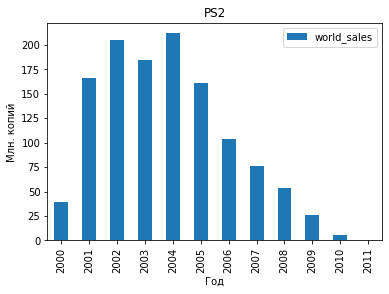

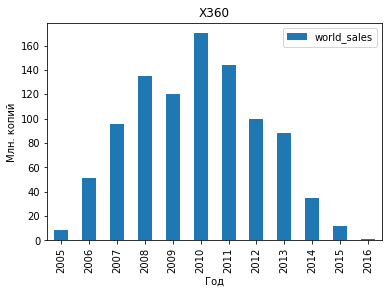

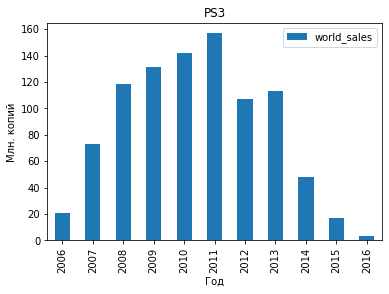

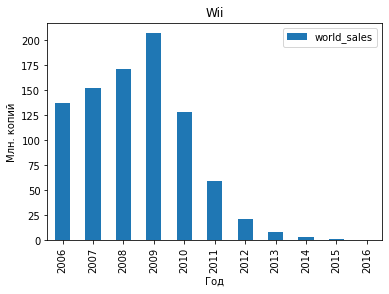

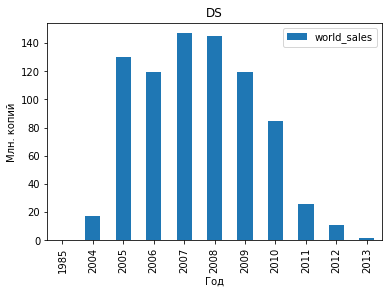

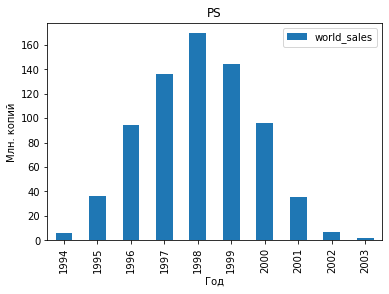

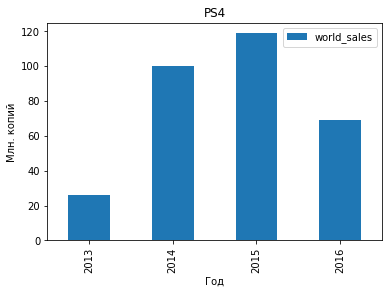

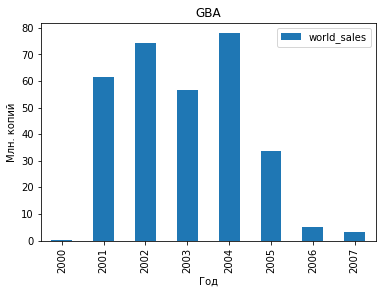

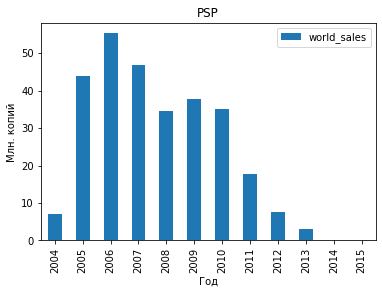

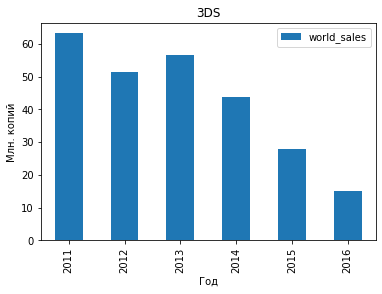

In [19]:
for platform in top_platform_list:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(kind='bar')
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Млн. копий')
# строим графики для топ-платформ

Вывод: из полученных данных видно, что средний срок жизни платфотры составляет 8-10 лет, максимальные продажи платформа показывает, как правило, в середине жизненного цикла.

Тогда, чтобы сделать прогноз на 2017 год и выбрать платформы, которые будут показывать в следующем году максимальные продажи, мы останавливаемся на тех, которые сейчас находятся в середине жизненного цикла и находятся на подъёме. Значит мы можем ограничиться временным отрезком в 4-5 лет.

### Выделяем актуальные данные

In [20]:
data_act = data.query('year_of_release >= 2012')
# формируем датасет с актуальными данными
data_act.info()
# смотрим общую информацию о датасете
data_act.describe()
# смотрим общую информацию о данных

<class 'pandas.core.frame.DataFrame'>

Int64Index: 2886 entries, 16 to 16714

Data columns (total 12 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   name             2886 non-null   object 

 1   platform         2886 non-null   object 

 2   year_of_release  2886 non-null   int64  

 3   genre            2886 non-null   object 

 4   na_sales         2886 non-null   float64

 5   eu_sales         2886 non-null   float64

 6   jp_sales         2886 non-null   float64

 7   other_sales      2886 non-null   float64

 8   critic_score     1312 non-null   float64

 9   user_score       1531 non-null   float64

 10  rating           2886 non-null   object 

 11  world_sales      2886 non-null   float64

dtypes: float64(7), int64(1), object(4)

memory usage: 293.1+ KB


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,world_sales
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,1312.000000,1531.000000,2886.000000
mean,2013.916840,0.204771,0.175613,0.066729,0.054109,72.258384,6.636120,0.501223
std,1.411766,0.566696,0.505346,0.241575,0.164639,12.687087,1.569033,1.249157
min,2012.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.040000
50%,2014.000000,0.030000,0.030000,0.010000,0.010000,74.000000,7.000000,0.120000
75%,2015.000000,0.170000,0.140000,0.050000,0.040000,81.000000,7.800000,0.430000
max,2016.000000,9.660000,9.090000,4.390000,3.960000,97.000000,9.300000,21.050000


### Выбираем и анализируем наиболее успешные платформы

In [21]:
(data_act.pivot_table(index='platform', values='world_sales', aggfunc='sum')
.sort_values(by='world_sales', ascending=False))
# формируем сводную таблицу с мировыми продажами по платформам

,world_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Вывод: из таблицы видно, что наибольшие продажи за последние 5 лет показали следующие платформы: PS4, PS3, X360, 3DS, XOne, WiiU, PSV, Wii, PSP.

Text(0, 0.5, 'Млн. копий')

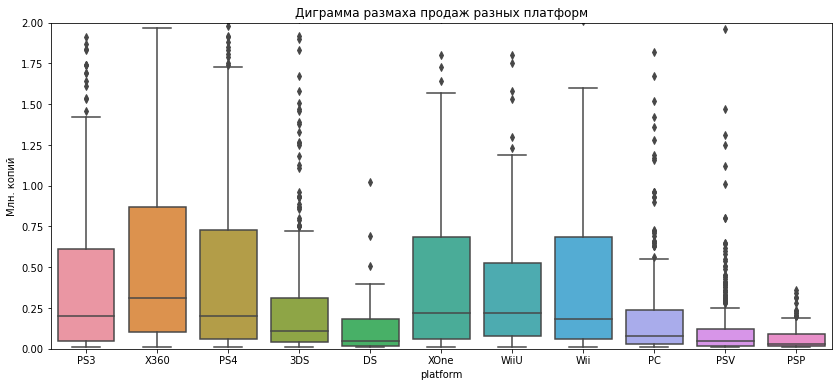

In [22]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data_act, x='platform', y='world_sales')
plt.ylim(0,2)
plt.title('Диграмма размаха продаж разных платформ')
plt.ylabel('Млн. копий')
# строим диаграмму размаха

Text(0, 0.5, 'Млн. копий')

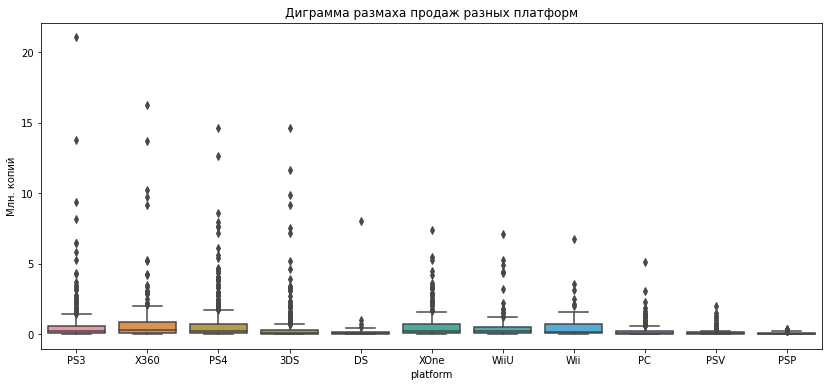

In [23]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data_act, x='platform', y='world_sales')
plt.title('Диграмма размаха продаж разных платформ')
plt.ylabel('Млн. копий')
# строим диаграмму размаха

In [24]:
data_act.groupby('platform')['world_sales'].describe()
# выводим информацию о данных, на основе которых мы строили диаграмму размаха

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


Вывод: из диаграммы видно, что разброс продаж среди разных платформ очень большой. Метод describe, примененный к данным, на основании которых строилась диаграмма размаха, подтверждает это. 

Если резюмировать, то есть платформы, которые продают очень много игр, есть те, которые наоборот продают очень мало, и надо ориентироваться в своём прогнозе на первые.

Дальше будем разбираться с каждой отдельно взятой платформой.

In [25]:
data_act_platform = (data_act.pivot_table(index='platform', values='world_sales', aggfunc='sum')
.sort_values(by='world_sales', ascending=False))
data_act_platform = data_act_platform.reset_index()
# создаём датасет с платформами, показавшими лучшие продажи

In [26]:
data_act_platform_list = data_act_platform['platform'].unique()
print(top_platform_list)
# создаём список топ-платформ

['PS2' 'X360' 'PS3' 'Wii' 'DS' 'PS' 'PS4' 'GBA' 'PSP' '3DS']


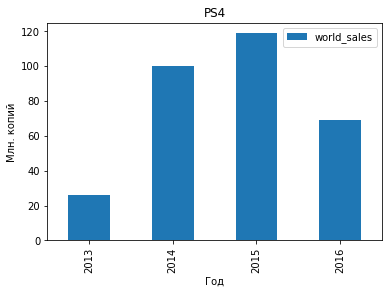

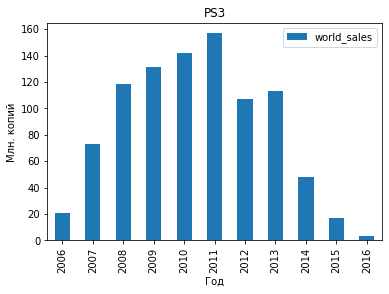

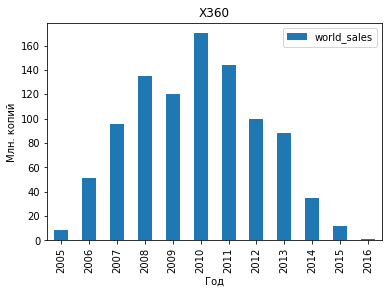

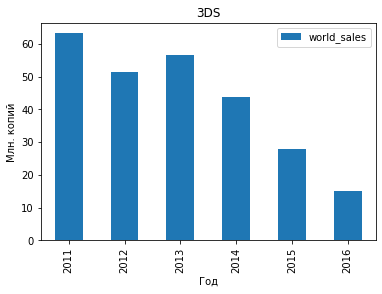

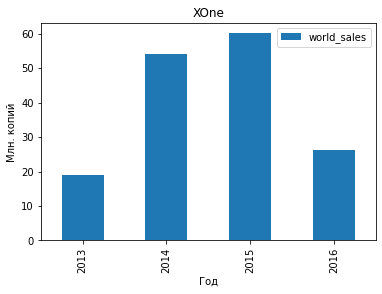

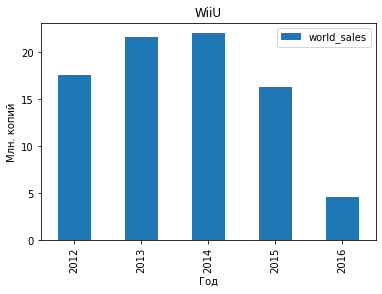

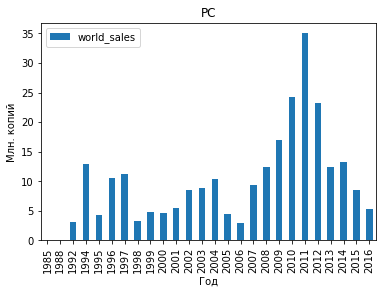

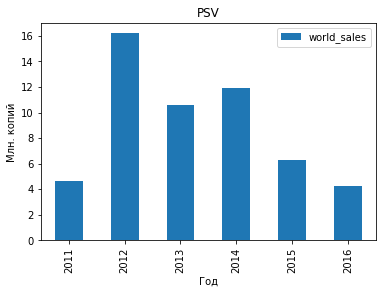

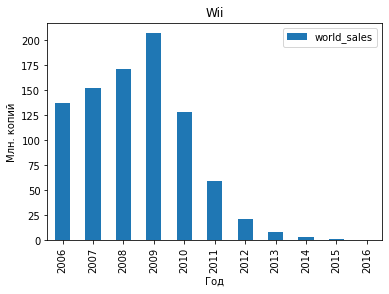

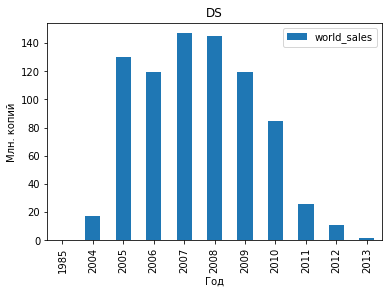

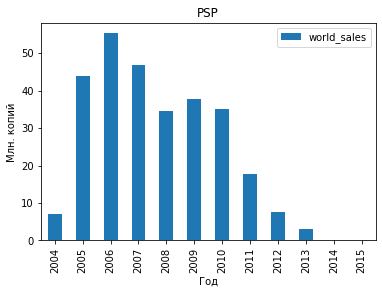

In [27]:
for platform in data_act_platform_list:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(kind='bar')
    plt.title(platform)
    plt.xlabel('Год')
    plt.ylabel('Млн. копий')
# строим графики для топ-платформ

Вывод. 

Как видно из графиков, платформы PSP, Wii, X360, PS3 находятся в конце жизненного цикла, продавать игры для них в 2017 г. не имеет смысла.

Платформы PSV, PC, WiiU тоже движутся к закату, но ещё могут показать какие-то значимые продажи в 2017 г.

Платформы PS4, XOne, 3DS показывают наилучшие продажи, на них стоит делать ставку в первую очередь в 2017 г.

### Оцениваем влияние отзывов критиков и пользователей на успех игры в рамках одной платформы

#### PS4

Text(0, 0.5, 'Млн. копий')

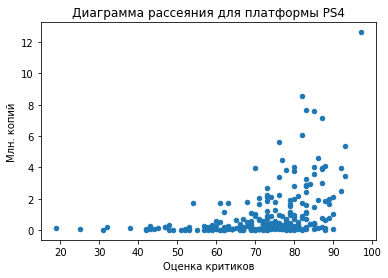

In [28]:
data_act.query('platform == "PS4"').plot(x='critic_score', y='world_sales', kind='scatter')
plt.title('Диаграмма рассеяния для платформы PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Млн. копий')
# строим диаграмму рассеяния продаж в зависимости от оценки критиков для платформы PS4

In [29]:
(data_act.query('platform == "PS4"')['world_sales']
.corr(data_act.query('platform == "PS4"')['critic_score']))
# считаем корреляцию между оценкой критиков и продажами игр для платформы PS4

0.406567902061781

Text(0, 0.5, 'Млн. копий')

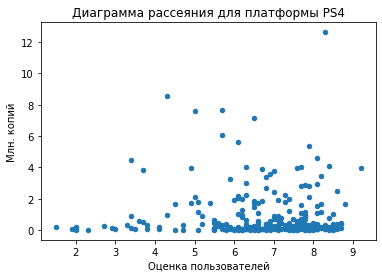

In [30]:
data_act.query('platform == "PS4"').plot(x='user_score', y='world_sales', kind='scatter')
plt.title('Диаграмма рассеяния для платформы PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Млн. копий')
# строим диаграмму рассеяния продаж в зависимости от оценки пользователей для платформы PS4

In [31]:
(data_act.query('platform == "PS4"')['world_sales']
.corr(data_act.query('platform == "PS4"')['user_score']))
# считаем корреляцию между оценкой пользователй и продажами игр для платформы PS4

-0.031957110204556376

Вывод. 
Между оценками критиков и продажами игр на платформе PS4 наблюдается слабая прямая зависимость.
Между оценками пользователей и продажами игр на платформе PS4 зависимости нет.

#### XOne

Text(0, 0.5, 'Млн. копий')

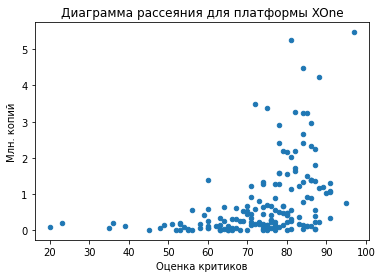

In [32]:
data_act.query('platform == "XOne"').plot(x='critic_score', y='world_sales', kind='scatter')
plt.title('Диаграмма рассеяния для платформы XOne')
plt.xlabel('Оценка критиков')
plt.ylabel('Млн. копий')
# строим диаграмму рассеяния продаж в зависимости от оценки критиков для платформы XOne

In [33]:
(data_act.query('platform == "XOne"')['world_sales']
.corr(data_act.query('platform == "XOne"')['critic_score']))
# считаем корреляцию между оценкой критиков и продажами игр для платформы XOne

0.41699832800840175

Text(0, 0.5, 'Млн. копий')

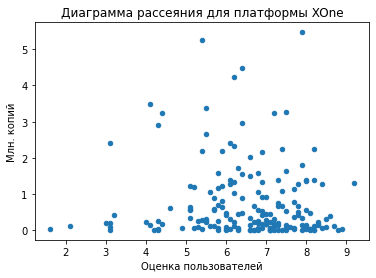

In [34]:
data_act.query('platform == "XOne"').plot(x='user_score', y='world_sales', kind='scatter')
plt.title('Диаграмма рассеяния для платформы XOne')
plt.xlabel('Оценка пользователей')
plt.ylabel('Млн. копий')
# строим диаграмму рассеяния продаж в зависимости от оценки пользователей для платформы XOne

In [35]:
(data_act.query('platform == "XOne"')['world_sales']
.corr(data_act.query('platform == "XOne"')['user_score']))
# считаем корреляцию между оценкой пользователй и продажами игр для платформы XOne

-0.06892505328279412

Вывод. 

Между оценками критиков и продажами игр на платформе XOne наблюдается слабая прямая зависимость.

Между оценками пользователей и продажами игр на платформе Xone зависимости нет.

### Распределение игр по жанрам

In [36]:
(data_act.pivot_table(index='genre', values='world_sales', aggfunc='mean')
.sort_values(by='world_sales', ascending=False))
# формируем сводную таблицу с продажами игр по жанрам

,world_sales
genre,
Shooter,1.296723
Platform,0.717647
Sports,0.675634
Role-Playing,0.521081
Racing,0.465217
Misc,0.442917
Simulation,0.439000
Action,0.427856
Fighting,0.408165


Вывод. Как видно из таблицы, жанр Shooter продаётся лучше всех. Также много игр продаётся в жанрах Role-Playing, Sports, Misc, Platform, Racing, Fighting, Action. На продажи игр в этих жанрах стоит делать упор в 2017 г.

## Портрет пользователя каждого региона

### Регион NA

#### Самые популярные платформы

In [37]:
(data_act.pivot_table(index='platform', values='na_sales', aggfunc='sum')
.sort_values(by='na_sales', ascending=False).head(6))
# строим сводную таблицу продаж игр по платформам в регионе NA

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31
WiiU,38.10


#### Самые популярные жанры

In [38]:
(data_act.pivot_table(index='genre', values='na_sales', aggfunc='median')
.sort_values(by='na_sales', ascending=False).head())
# строим сводную таблицу продаж игр по жанрам в регионе NA

,na_sales
genre,
Shooter,0.20
Platform,0.09
Sports,0.08
Fighting,0.05
Racing,0.04


#### Влияние рейтинга

In [39]:
(data_act.pivot_table(index='rating', values='na_sales', aggfunc='sum')
.sort_values(by='na_sales', ascending=False).head())
# строим сводную таблицу продаж игр по рейтинуг в регионе NA

,na_sales
rating,
M,231.57
E,114.37
unknown,103.31
E10+,75.70
T,66.02


Выводы. 

В регионе NA самыми популярными платформами для игр являются X360, PS4, PS3, XOne, 3DS, при этом X360 на первом месте, существенно опережая другие платформы.

Самые популярные жанры Shooter, Platform, Sports.

Игры с рейтингом М (17+) являются самыми популярными, далее идёт рейтинг Е(10+) и на третьем месте игры без рейтинга.

### Регион EU

#### Самые популярные платформы

In [40]:
(data_act.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
.sort_values(by='eu_sales', ascending=False).head())
# строим сводную таблицу продаж игр по платформам в регионе EU

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


#### Самые популярные жанры

In [41]:
(data_act.pivot_table(index='genre', values='eu_sales', aggfunc='mean')
.sort_values(by='eu_sales', ascending=False).head())
# строим сводную таблицу продаж игр по жанрам в регионе EU

,eu_sales
genre,
Shooter,0.482851
Sports,0.257799
Platform,0.251882
Racing,0.237304
Simulation,0.181875


#### Влияние рейтинга

In [42]:
(data_act.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
.sort_values(by='eu_sales', ascending=False).head())
# строим сводную таблицу продаж игр по рейтинуг в регионе EU

,eu_sales
rating,
M,193.96
E,113.03
unknown,91.50
E10+,55.37
T,52.96


Выводы.

В отличие от региона NA, в регионе EU платформы PS4 и PS3 существенно опережают X360 и XOne по продажам игр, замыкает пятёрку платформа 3DS.

Игры жанров Shooter, Sports и Platform являются самыми популярными.

В возрастными рейтингами ситуация аналогичная региону NA - больше всего игр продаётся рейтингов M и Е, не треьем месте игры без рейтинга.

### Регион JP

#### Самая популярная платформа

In [43]:
(data_act.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
.sort_values(by='jp_sales', ascending=False).head())
# строим сводную таблицу продаж игр по платформам в регионе JP

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


#### Самый популярный жанр

In [44]:
(data_act.pivot_table(index='genre', values='jp_sales', aggfunc='median')
.sort_values(by='jp_sales', ascending=False).head())
# строим сводную таблицу продаж игр по жанрам в регионе JP

,jp_sales
genre,
Role-Playing,0.06
Fighting,0.03
Misc,0.02
Action,0.01
Adventure,0.01


#### Влияние рейтинга

In [45]:
(data_act.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
.sort_values(by='jp_sales', ascending=False).head())
# строим сводную таблицу продаж игр по рейтинуг в регионе JP

,jp_sales
rating,
unknown,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


Выводы.

Регион JP разительным образом отличается от регионов NA и EU. Это касается и платформ, и жанров, и возрастных рейтингов.

Самой популярной платформой является 3DS, в 2 раза опережая PS3. Также в пятёрку наиболее популярных платформ входят PSV, PS4, WiiU.

Среди жанров, самыми пополуряными являются Role-Playing, Fighting и Misc занимают первые три строчки.

С существенным отрывом продаются игры без рейтинга, видимо, в силу того, что рейтинг американский и японские игры они особо не оценивают.

## Проверка гипотез

### Средние пользовательские рейтинги платформ

Нулевая гипотеза: средние пользовательские рейтинги платформ XOne и PC совпадают.

Альтернативная гипотеза: средние пользовательские рейтинги платформ XOne и PC различаются.

In [46]:
data_act_xone = data_act.query('platform == "XOne"')
# формируем датасет из пользователей платформы XOne
data_act_xone.describe()
# смотрим информацию по значениям датасета

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,world_sales
count,247.000000,247.000000,247.000000,247.000000,247.000000,169.000000,182.000000,247.000000
mean,2014.951417,0.377004,0.208866,0.001377,0.057773,73.325444,6.521429,0.645020
std,0.952995,0.630618,0.365306,0.005153,0.094221,12.953465,1.380941,1.036139
min,2013.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.600000,0.010000
25%,2014.000000,0.030000,0.020000,0.000000,0.010000,66.000000,5.800000,0.060000
50%,2015.000000,0.120000,0.070000,0.000000,0.020000,76.000000,6.800000,0.220000
75%,2016.000000,0.385000,0.220000,0.000000,0.060000,82.000000,7.500000,0.685000
max,2016.000000,4.590000,2.190000,0.040000,0.680000,97.000000,9.200000,7.390000


In [47]:
data_act_pc = data_act.query('platform == "PC"')
# формируем датасет из пользователей платформы PC
data_act_pc.describe()
# смотрим информацию по значениям датасета

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,world_sales
count,250.000000,250.000000,250.000000,250.0,250.000000,198.000000,206.000000,250.00000
mean,2013.992000,0.076480,0.151040,0.0,0.023080,75.838384,6.428641,0.25060
std,1.483489,0.209996,0.255119,0.0,0.052348,10.389087,1.664465,0.49464
min,2012.000000,0.000000,0.000000,0.0,0.000000,33.000000,1.400000,0.01000
25%,2013.000000,0.000000,0.020000,0.0,0.000000,71.000000,5.500000,0.03000
50%,2014.000000,0.000000,0.060000,0.0,0.010000,77.500000,6.800000,0.08000
75%,2015.000000,0.080000,0.150000,0.0,0.020000,83.000000,7.700000,0.24000
max,2016.000000,2.440000,2.160000,0.0,0.540000,96.000000,9.300000,5.14000


In [48]:
alpha = 0.05
# задаём коэффициент значимости
results = st.ttest_ind(data_act_xone['user_score'].dropna(), data_act_pc['user_score'].dropna())
print('p-значение:', results.pvalue)
print('Средння пользовательская оценка XOne:', data_act_xone['user_score'].mean())
print('Средняя пользовательская оценка PC:', data_act_pc['user_score'].mean())
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661

Средння пользовательская оценка XOne: 6.521428571428572

Средняя пользовательская оценка PC: 6.428640776699029

Не получилось отвергнуть нулевую гипотезу


Вывод: по результатам теста нельзя отвергнуть нулевую гипотезу, сравнение средних значений говорит нам о том же - средние пользовательские рейтинги практически одинаковые.

### Средние пользовательские рейтинги жанров

Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports совпадают.

Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports различаются.

In [49]:
data_act_action = data_act.query('genre == "Action"')
# формируем датасет по жанру Action
data_act_action.describe()
# смотрим информацию по значениям датасета

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,world_sales
count,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000,436.000000,523.000000,1031.000000
mean,2013.934045,0.172493,0.154549,0.051212,0.049602,71.378440,6.825048,0.427856
std,1.450649,0.500780,0.498182,0.151925,0.182412,12.093748,1.374440,1.166504
min,2012.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.600000,0.010000
25%,2012.000000,0.000000,0.000000,0.000000,0.000000,65.000000,6.250000,0.030000
50%,2014.000000,0.020000,0.020000,0.010000,0.010000,73.000000,7.100000,0.120000
75%,2015.000000,0.160000,0.130000,0.050000,0.040000,80.000000,7.800000,0.390000
max,2016.000000,9.660000,9.090000,2.790000,3.960000,97.000000,9.100000,21.050000


In [50]:
data_act_sports = data_act.query('genre == "Sports"')
# формируем датасет по жанру Sports
data_act_sports.describe()
# смотрим информацию по значениям датасета

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,world_sales
count,268.000000,268.000000,268.000000,268.000000,268.000000,143.000000,195.000000,268.000000
mean,2013.977612,0.304216,0.257799,0.029888,0.083731,72.895105,5.455897,0.675634
std,1.395372,0.509961,0.723696,0.066701,0.172073,15.473154,1.738646,1.136378
min,2012.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.200000,0.010000
25%,2013.000000,0.000000,0.010000,0.000000,0.000000,68.000000,4.300000,0.080000
50%,2014.000000,0.080000,0.050000,0.000000,0.020000,77.000000,5.700000,0.240000
75%,2015.000000,0.360000,0.210000,0.020000,0.090000,83.000000,6.800000,0.742500
max,2016.000000,2.600000,6.120000,0.490000,1.370000,90.000000,8.800000,8.580000


In [51]:
alpha = .05
# задаём коэффициент значимости
results = st.ttest_ind(data_act_action['user_score'].dropna(), data_act_sports['user_score'].dropna(), equal_var=False)
print('p-значение:', results.pvalue)
print('Средння пользовательская оценка жанра Action:', data_act_action['user_score'].mean())
print('Средняя пользовательская оценка жанра Sports:', data_act_sports['user_score'].mean())
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20

Средння пользовательская оценка жанра Action: 6.825047801147227

Средняя пользовательская оценка жанра Sports: 5.455897435897437

Отвергаем нулевую гипотезу


Вывод: средние пользовательские оценки жанров Аction и Sports различаются, значит отвергаем нулевую гипотезу в пользу альтернативной.

## Общий вывод

На основании проведённых исследований можно дать следующие рекомендации для планирования рекламного бюджета на следующий год:
1. Средний срок жизни платформ составляет 8-10 лет. В рассматриваемом нами периоде есть платформы, которые уже закатились или движутся к концу жизненного цикла, хотя и показывали хорошие продажи в прошлом. Поэтому в первую очередь надо продавать и продвигать игры на платформах, которые являются и будут наиболее популярными среди игроков, а именно XOne, PS4, 3DS.
2. Популярность игровых жанров также существенно различается, в первую очередь имеет смысл продавать и продвигать игры таких жанров, как Shooter, Role-Playing, Misc, Sports.
3. Возрастной рейтинг тоже влияет на продажи игр, лучше всего продаются игры с рейтингом M, E и игры без рейтинга.
4. При планировании рекламных компаний необходимо учитывать специфику разных регионов, игроки Японии по своим предпочтениям существенно отличаются от игроков в Северной Америке и Европе.
5. Оценка критиков имеет слабую корреляцию на продажи игр, поэтому имеет смысл рекламировать в первую очередь игры с высокой оценкой. Оценка пользователей никак не влияет на продажу, этот параметр можно игнорировать.